# Aluno: Fernando Gomes Papi

In [1]:
import numpy as np
from tabulate import tabulate
from matplotlib import pyplot as plt

In [2]:
def calc_expected_return(w, r):
    return np.dot(w,r)

def calc_variance(w, covariance_matrix):
    return np.dot(np.dot(w, covariance_matrix), w)

def calc_portfolio_coefficients(sigma_1, sigma_2, correlation):
    a = sigma_1**2 + sigma_2**2 - 2*correlation*sigma_1*sigma_2
    b = -2*(sigma_2**2 - correlation*sigma_1*sigma_2)
    c = sigma_2**2

    return a, b, c

def calc_min_risk_2_assets(sigma_1, sigma_2, correlation):
    a, b, c = calc_portfolio_coefficients(sigma_1, sigma_2, correlation)
    min_risk_w = -b/(2*a)

    return min_risk_w

def solve_portfolio(sigma_1, sigma_2, correlation, desired_variance):
    a, b, c = calc_portfolio_coefficients(sigma_1, sigma_2, correlation)
    l1 = (-b + np.sqrt(b**2 - 4*a*(c-desired_variance)))/(2*a)
    l2 = (-b - np.sqrt(b**2 - 4*a*(c-desired_variance)))/(2*a)
    return l1, l2

def get_risk_return_table(r, weight_list, covariance_matrix):
    risk_return_table = []
    for w in weight_list:
        expected_value = calc_expected_return(w, r)
        portfolio_variance = calc_variance(w, covariance_matrix)
        risk_return_table.append([w[0], expected_value, portfolio_variance])
    
    return risk_return_table

def print_return_table(risk_return_table):
    print(tabulate(risk_return_table, ['w_1', 'E(P)', 'Var(P)' ], tablefmt="outline", floatfmt=".4"))

In [3]:
def plot_risk_return(rr_table):    
    # Extract the data sorted by variance low to high
    
    sorted_rr_table = sorted(rr_table, key=lambda x: x[2])
    asset1_amounts = [row[0] for row in sorted_rr_table]
    expected_values = [row[1] for row in sorted_rr_table]
    variance_values = [row[2] for row in sorted_rr_table]
    
    # Create a color gradient based on risk (from blue to red)
    colors = plt.cm.RdYlBu(np.linspace(1, 0, len(variance_values)))
    
    # Create the scatter plot
    fig = plt.figure(figsize=(7, 7))
    fig = plt.scatter(variance_values, expected_values, c=colors, s=60, marker='o', edgecolors='k', zorder=3)
    
    # Add labels and a colorbar
    fig = plt.xlabel('Var(P)')
    fig = plt.ylabel('E(P)')
    fig = plt.title('Risk vs. Expected Return')
    
    for i, amount in enumerate(asset1_amounts):
        fig = plt.annotate(f'$w_1$={amount:.2f}', (variance_values[i], expected_values[i]), 
                           textcoords="offset points", 
                           xytext=(0,10), ha='center', 
                           bbox=dict(boxstyle='round, pad=0.2',
                           edgecolor='wheat', facecolor='wheat', alpha=0.5))
    # Replace x-axis ticks with asset 1 amounts and y-axis ticks with expected values
    fig = plt.yticks(expected_values)

    # Show the plot
    fig = plt.grid(True)
    fig = plt.show()

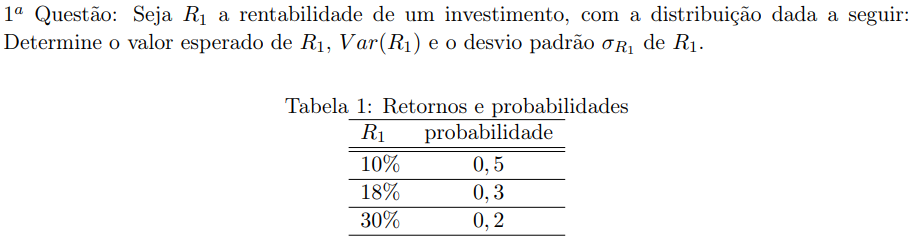

O valor esperado é:
$$E(R_1) = 0.1 * 0.5 + 0.18 * 0.3 + 0.3*0.2 = 0.164$$

A variância é dada por:
$$Var(R_1) = E(R_1^2) - E(R_1)^2 = 0.005824$$

E o devio padrão é:
$$\sigma_{R_1} = \sqrt{Var(R_1)} = 0.076315 $$

In [4]:
r1 = np.array([0.1, 0.18, 0.30])
p1 = np.array([0.5, 0.3, 0.2])

In [5]:
expected_value = np.dot(r1, p1)
variance = np.dot(r1**2, p1) - expected_value**2
std_dev = variance ** 0.5

In [27]:
print(f"Expected value: {expected_value :.4f}")
print(f"Variance: {variance :.6f}")
print(f"Std: {std_dev :.6f}")

Expected value: 0.1640
Variance: 0.005824
Std: 0.076315


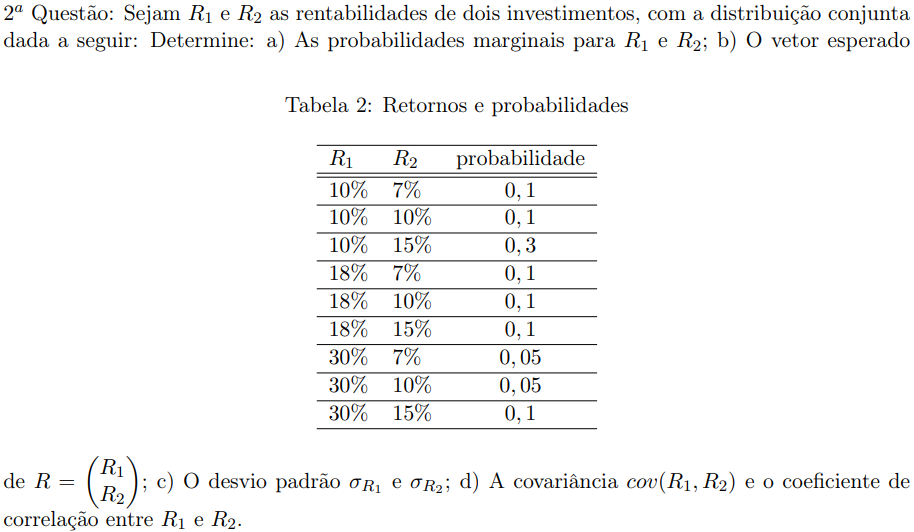

In [26]:
import numpy as np

# Define the first set of returns and probabilities
r1 = np.array([0.1, 0.18, 0.30])
#r1 = np.array([0.1, 0.15, 0.25])
p1 = np.array([0.5, 0.3, 0.2])

# Calculate expected value, variance, and standard deviation for the first set
expected_value_a1 = np.dot(r1, p1)
variance_a1 = np.dot(r1**2, p1) - expected_value_a1**2
std_dev_a1 = variance_a1 ** 0.5

# Define the second set of returns and probabilities
r2 = np.array([0.07, 0.1, 0.15])
#r2 = np.array([0.05, 0.08, 0.12])
p2 = np.array([0.25, 0.25, 0.5])

# Calculate expected value, variance, and standard deviation for the second set
expected_value_a2 = np.dot(r2, p2)
variance_a2 = np.dot(r2**2, p2) - expected_value_a2**2
std_dev_a2 = variance_a2 ** 0.5

# Print statistics for the first and second sets
print(f"Expected value R1: {expected_value_a1 :.4f}")
print(f"Variance R1: {variance_a1 :.6f}")
print(f"Std_dev R1: {std_dev_a1 :.6f}")
print('-x-')
print(f"Expected value R2: {expected_value_a2 :.4f}")
print(f"Variance R2: {variance_a2 :.6f}")
print(f"Std_dev R2: {std_dev_a2 :.6f}")

# Define conditional probabilities
cond_probabilities = [0.1, 0.1, 0.3, 0.1, 0.1, 0.1, 0.05, 0.05, 0.1]

# Calculate the covariance between r1 and r2
covariance = np.dot(np.array([r1[0], r1[0], r1[0], r1[1], r1[1], r1[1], r1[2], r1[2], r1[2]]) * np.array([r2[0], r2[1], r2[2], r2[0], r2[1], r2[2], r2[0], r2[1], r2[2]]), 
                    cond_probabilities) - expected_value_a1*expected_value_a2

# Calculate the correlation between r1 and r2
correlation = covariance/(std_dev_a1*std_dev_a2)

# Print the covariance and correlation
print('-x-')
print(f'Covariance {covariance :.4}')
print(f'Correlation {correlation :.4}')

Expected value R1: 0.1640
Variance R1: 0.005824
Std_dev R1: 0.076315
-x-
Expected value R2: 0.1175
Variance R2: 0.001169
Std_dev R2: 0.034187
-x-
Covariance -0.00026
Correlation -0.09966


#### a)
As probabilidades marginais são:


| R1 | Prob. |\|\|| R2 | Prob. |
|----|-------|-|----|-------|
| 10%  | 0.5 |\|\|| 7%  | 0.25 |
| 18%  | 0.3 |\|\|| 10%  | 0.25 |
| 30%  | 0.2 |\|\|| 15%  | 0.5 |

#### b)

$$
R = \begin{pmatrix}
0.164 \\
0.1175  
\end{pmatrix}
$$

#### c)

$$
\sigma_{R_1} = 0.076315
$$
$$
\sigma_{R_2} = 0.034187
$$

#### d)

$$
cov(R1, R2) = -0.00026
$$
$$
\rho(R1, R2) = \frac{cov(R1,R2)}{(\sigma_1\sigma_2)} = -0.09966
$$

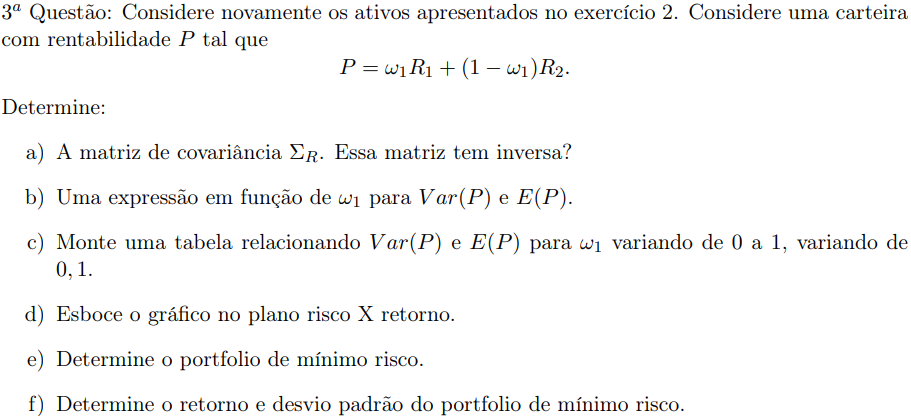

In [8]:
covariance_matrix = np.array([[variance_a1, covariance],[covariance, variance_a2]])
print('Cov Matrix:\n', covariance_matrix)
print('Inv Cov Matrix:\n', np.linalg.inv(covariance_matrix))

Cov Matrix:
 [[ 0.005824   -0.00026   ]
 [-0.00026     0.00116875]]
Inv Cov Matrix:
 [[173.42562915  38.58024691]
 [ 38.58024691 864.19753086]]


#### a)

$$
\Sigma_R = \begin{pmatrix}
\sigma_{R_1}^2 & \sigma_{R_1,R_2} \\
\sigma_{R_1,R_2} & \sigma_{R_2}^2 \end{pmatrix}
= \begin{pmatrix}
0.005824 & -0.00026 \\
-0.00026 & 0.001169 \end{pmatrix}
$$

A matriz possui inversa pois é uma matriz com determinante $\neq 0$, dada por:
$$
\Sigma_R^{-1} = \begin{pmatrix}
173.43 & 38.58 \\
 38.58 & 864.2 \end{pmatrix}
$$

#### b)
$$
E(P) = \omega^T*E(R) = \omega_1R_1 + (1-\omega_1)R_2
$$

$$
Var(P) = \omega^T\Sigma\omega = a\omega_1^2 + b\omega_1 + c
$$
onde
$$
a = \sigma_1^2 + \sigma_2^2 - 2\rho\sigma_1\sigma_2
$$
$$
b = 2\rho\sigma_1\sigma_2 - 2\sigma_2^2
$$
$$
c = \sigma_2^2
$$

#### c)

In [9]:
r = [expected_value_a1, expected_value_a2]
weight_list = [np.array([i, 1-i]) for i in np.arange(0, 1.1, 0.1)]

risk_return_table = get_risk_return_table(r, weight_list, covariance_matrix)

print_return_table(risk_return_table)

+-------+--------+-----------+
|   w_1 |   E(P) |    Var(P) |
+=======+========+===========+
|   0.0 | 0.1175 | 0.001169  |
|   0.1 | 0.1221 | 0.0009581 |
|   0.2 | 0.1268 | 0.0008978 |
|   0.3 | 0.1315 | 0.0009876 |
|   0.4 | 0.1361 | 0.001228  |
|   0.5 | 0.1407 | 0.001618  |
|   0.6 | 0.1454 | 0.002159  |
|   0.7 | 0.1501 | 0.00285   |
|   0.8 | 0.1547 | 0.003691  |
|   0.9 | 0.1593 | 0.004682  |
|   1.0 | 0.164  | 0.005824  |
+-------+--------+-----------+


#### d)

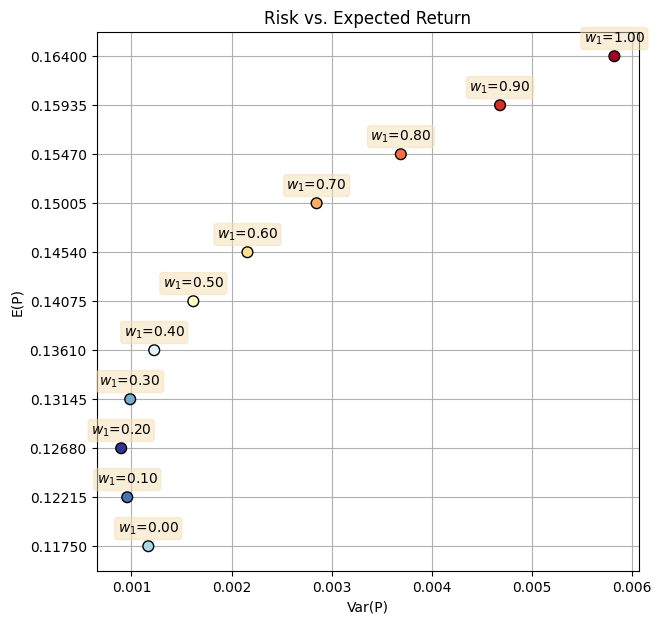

In [10]:
plot_risk_return(risk_return_table)

#### e)

Dada que a variância $\sigma^2 = f(\omega_1)$, e $f$ é uma função quadrática convexa, temos que o mínimo risco se dará quando
$$
f(\omega_1)' = 0 \implies 2a\omega_1^* + b = 0 \implies \omega_1^* = \frac{-b}{2a}
$$
neste ponto temos:
$$
\omega_1^* = 0.1902
$$

In [24]:
min_risk_w = calc_min_risk_2_assets(std_dev_a1, std_dev_a2, correlation)
opt_portfolio = np.array([min_risk_w, 1-min_risk_w])

min_risk_expected_value = calc_expected_return(opt_portfolio, r)
min_risk_variance = calc_variance(opt_portfolio, covariance_matrix)

print(f'Optimal w_1: {min_risk_w :.4}')
print(f'Retorno esperado com risco mínimo: {min_risk_expected_value :.4}')
print(f'Desvio padrão mínimo: {min_risk_variance**0.5 :.4}')

Optimal w_1: 0.3094
Retorno esperado com risco mínimo: 0.1319
Desvio padrão mínimo: 0.2144


#### f)

Com o valor de $\omega_1^*$ ótimo, temos:

$$
E(P^*) = 0.1263
$$
$$
\sigma^* = 0.02995
$$

In [23]:
w = np.array([min_risk_w, 1-min_risk_w])
r = [expected_value_a1, expected_value_a2]

min_risk_expected_value = calc_expected_return(w, r)
min_risk_variance = calc_variance(w, covariance_matrix)
print(f'Retorno esperado com risco mínimo: {min_risk_expected_value :.4}')
print(f'Variância mínima: {min_risk_variance :.4}')
print(f'Desvio padrão mínimo: {min_risk_variance**0.5 :.4}')

Retorno esperado com risco mínimo: 0.1485
Variância mínima: 3.852e-34
Desvio padrão mínimo: 1.963e-17


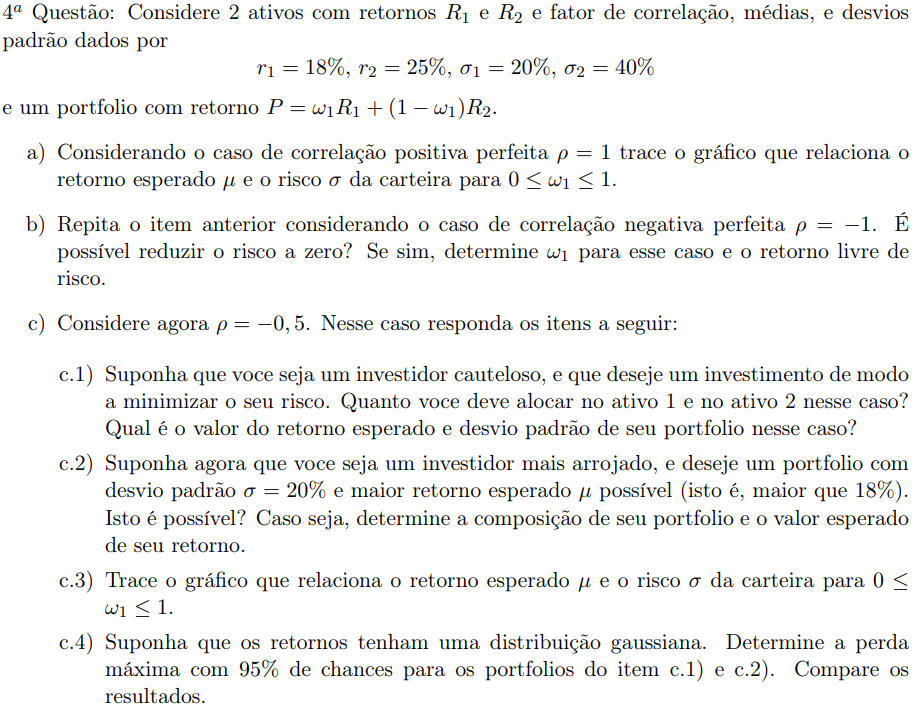

In [28]:
r1 = 0.18
r2 = 0.25
sigma_1 = 0.2
sigma_2 = 0.4

#### a)

+-------+--------+----------+
|   w_1 |   E(P) |   Var(P) |
+=======+========+==========+
|   0.0 |  0.25  |   0.16   |
|   0.1 |  0.243 |   0.1444 |
|   0.2 |  0.236 |   0.1296 |
|   0.3 |  0.229 |   0.1156 |
|   0.4 |  0.222 |   0.1024 |
|   0.5 |  0.215 |   0.09   |
|   0.6 |  0.208 |   0.0784 |
|   0.7 |  0.201 |   0.0676 |
|   0.8 |  0.194 |   0.0576 |
|   0.9 |  0.187 |   0.0484 |
|   1.0 |  0.18  |   0.04   |
+-------+--------+----------+


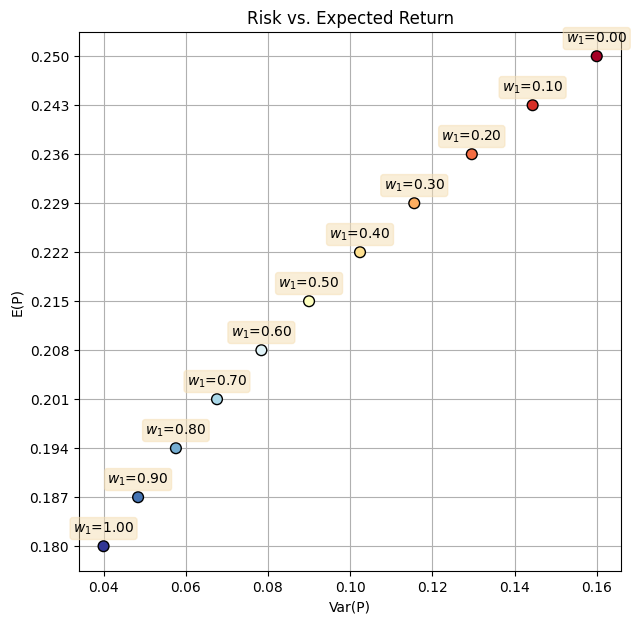

In [29]:
correlation = 1
covariance = (sigma_1*sigma_2)*correlation

covariance_matrix = np.array([
    [sigma_1**2, covariance],
    [covariance, sigma_2**2]
])

r = [r1, r2]

weight_list = [np.array([i, 1-i]) for i in np.arange(0, 1.1, 0.1)]

risk_return_table = get_risk_return_table(r, weight_list, covariance_matrix)

print_return_table(risk_return_table)
plot_risk_return(risk_return_table)

#### b)

In [30]:
correlation = -1
covariance = (sigma_1*sigma_2)*correlation

covariance_matrix = np.array([
    [sigma_1**2, covariance],
    [covariance, sigma_2**2]
])

r = [r1, r2]

weight_list = [np.array([i, 1-i]) for i in np.arange(0, 1.1, 0.1)]

risk_return_table = get_risk_return_table(r, weight_list, covariance_matrix)

# print_return_table(risk_return_table)
# plot_risk_return(risk_return_table)

min_risk_w = calc_min_risk_2_assets(sigma_1, sigma_2, correlation)
opt_portfolio = np.array([min_risk_w, 1-min_risk_w])

min_risk_expected_value = calc_expected_return(opt_portfolio, r)
min_risk_variance = calc_variance(opt_portfolio, covariance_matrix)

print(f'Optimal w_1: {min_risk_w :.4}')
print(f'Retorno esperado com risco mínimo: {min_risk_expected_value :.4}')
print(f'Desvio padrão mínimo: {min_risk_variance**0.5 :.4}')

Optimal w_1: 0.6667
Retorno esperado com risco mínimo: 0.2033
Desvio padrão mínimo: 1.963e-17


Matematicamente falando, não é possível reduzir o risco estritamente a zero, pois nenhum dos ativos possui risco 0. No entanto, na prática, a alocação ótima de $w_1 = 2/3$ possui variância de $3.852e-34$, valor muito próximo de zero.

In [32]:
correlation_c = -0.5
covariance_c = (sigma_1*sigma_2)*correlation_c

covariance_matrix_c = np.array([
    [sigma_1**2, covariance_c],
    [covariance_c, sigma_2**2]
])

#### c.1)

In [41]:
min_risk_w_c1 = calc_min_risk_2_assets(sigma_1, sigma_2, correlation_c)
opt_portfolio_c1 = np.array([min_risk_w_c1, 1-min_risk_w_c1])

min_risk_expected_value_c1 = calc_expected_return(opt_portfolio_c1, r)
min_risk_variance_c1 = calc_variance(opt_portfolio_c1, covariance_matrix_c)
sigma_c1 = min_risk_variance_c1**0.5

print(f'Optimal w_1: {min_risk_w_c1 :.4}')
print(f'Retorno esperado com risco mínimo: {min_risk_expected_value_c1 :.4}')
print(f'Desvio padrão mínimo: {sigma_c1 :.4}')

Optimal w_1: 0.7143
Retorno esperado com risco mínimo: 0.2
Desvio padrão mínimo: 0.1309


#### c.2)


In [45]:
desired_variance = 0.2**2
l1, l2 = solve_portfolio(sigma_1, sigma_2, correlation_c, desired_variance)

portfolio_c2 = np.array([l2, 1-l2])
expected_l2 = calc_expected_return(portfolio_c2, r)


expected_value_c2 = calc_expected_return(portfolio_c2, r)
variance_c2 = calc_variance(portfolio_c2, covariance_matrix_c)
sigma_c2 = variance_c2**0.5

print(f'Alocações possíveis p/ w1: ({l1 :.4}, {l2 :.4})')
print(f'Retorno esperado p/ w1 = 0.4286: {expected_l2 :.4}')
print(f'Desvio padrão: {sigma_c2 :.4}')

Alocações possíveis p/ w1: (1.0, 0.4286)
Retorno esperado p/ w1 = 0.4286: 0.22
Desvio padrão: 0.2


#### c.3)

+-------+--------+----------+
|   w_1 |   E(P) |   Var(P) |
+=======+========+==========+
|   0.0 |  0.25  |   0.16   |
|   0.1 |  0.243 |   0.1228 |
|   0.2 |  0.236 |   0.0912 |
|   0.3 |  0.229 |   0.0652 |
|   0.4 |  0.222 |   0.0448 |
|   0.5 |  0.215 |   0.03   |
|   0.6 |  0.208 |   0.0208 |
|   0.7 |  0.201 |   0.0172 |
|   0.8 |  0.194 |   0.0192 |
|   0.9 |  0.187 |   0.0268 |
|   1.0 |  0.18  |   0.04   |
+-------+--------+----------+


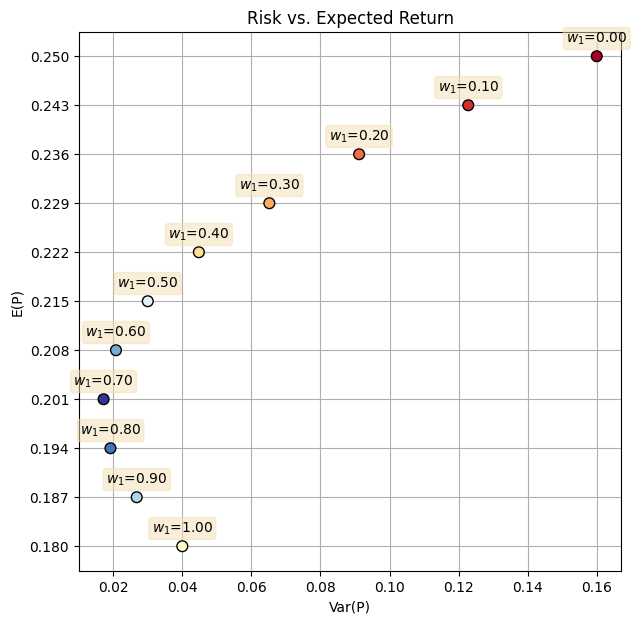

In [39]:
weight_list = [np.array([i, 1-i]) for i in np.arange(0, 1.1, 0.1)]

risk_return_table = get_risk_return_table(r, weight_list, covariance_matrix_c)
print_return_table(risk_return_table)
plot_risk_return(risk_return_table)

#### c.4)

In [48]:
## c1
min_risk_expected_value_c1, expected_value_c2
sigma_c1, sigma_c2

(min_risk_expected_value_c1 - 1.65*sigma_c1)*100, (expected_value_c2 - 1.65*sigma_c2)*100

(-1.603571133363249, -11.000000000000002)

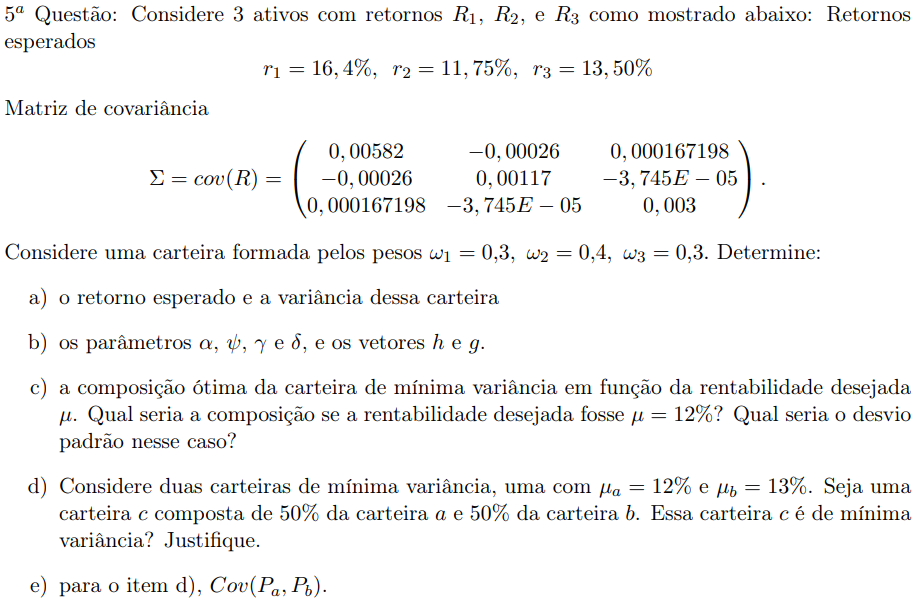

In [56]:
r1 = 0.164
r2 = 0.1175
r3 = 0.1350
# r1 = 0.145
# r2 = 0.0925
# r3 = 0.105

cov_matrix = np.array([
    [0.00582, -0.0026, 0.000167198],
    [-0.0026, 0.00117, -3.745e-5],
    [0.000167198, -3.745e-5, 0.003]
])

# cov_matrix = np.array([
#     [0.00323, -0.0001375, 7.18331e-5],
#     [-0.0001375, 0.00087, -1.86414e-5],
#     [7.18331e-5, -1.86414e-5, 0.001],
# ])
r = [r1, r2, r3]
w = [0.3, 0.4, 0.3]

calc_expected_return(w=w, r=r)*100, calc_variance(w, cov_matrix)**0.5*100

(13.670000000000002, 1.9444990100280328)

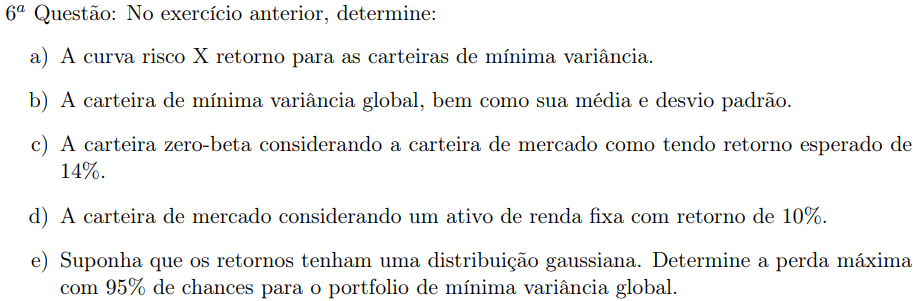

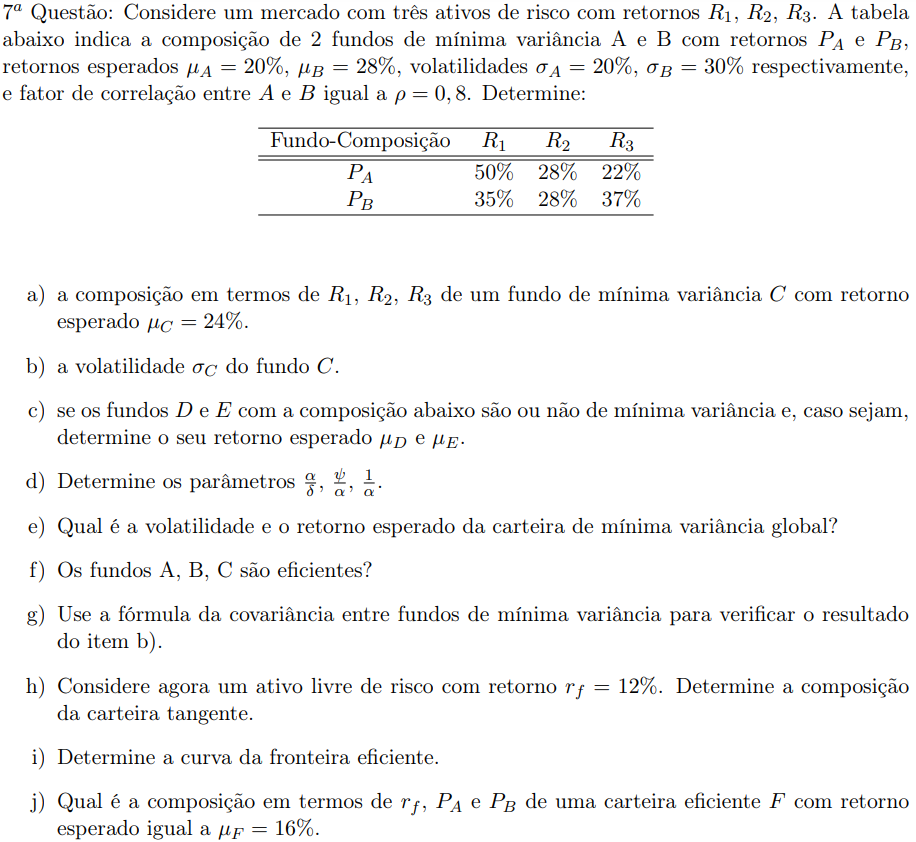
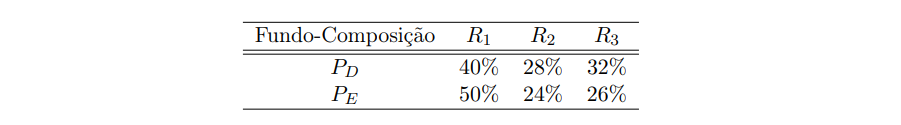